## Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle
import os
import glob

import utils # own local module

%matplotlib inline

## Directories and constants

In [2]:
output_imgs_dir = os.path.join('..', 'output_images')

cal_data_file = 'calibration.pickle' # file where to save the distortion coefficients
cal_imgs_dir = os.path.join('..', 'camera_cal')
cal_imgs = glob.glob(f'{cal_imgs_dir}/*.jpg')
cal_imgs_shape = (9, 6)
cal_test_img = os.path.join('..', 'test_images', 'test1.jpg')

## Camera calibration

Calibration images from the given camera have 9x6 inside corners.

In [3]:
def calibration_get_corners(imgs, shape):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., (9,6,0)
    objp = np.zeros((shape[1] * shape[0], 3), np.float32)
    objp[:,:2] = np.mgrid[0:shape[0], 0:shape[1]].T.reshape(-1, 2)
    
    obj_points = []
    img_points = []
    corner_imgs = []
    
    for idx, fname in enumerate(imgs):
        cal_img = mpimg.imread(fname)
        gray = cv2.cvtColor(cal_img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, cal_imgs_shape, None)

        if ret == True:
            obj_points.append(objp)
            img_points.append(corners)

            cv2.drawChessboardCorners(cal_img, cal_imgs_shape, corners, ret)
            corner_imgs.append(cal_img)
    return obj_points, img_points, corner_imgs

Number of calibration images provided: 20
Number of valid images for calibration: 17


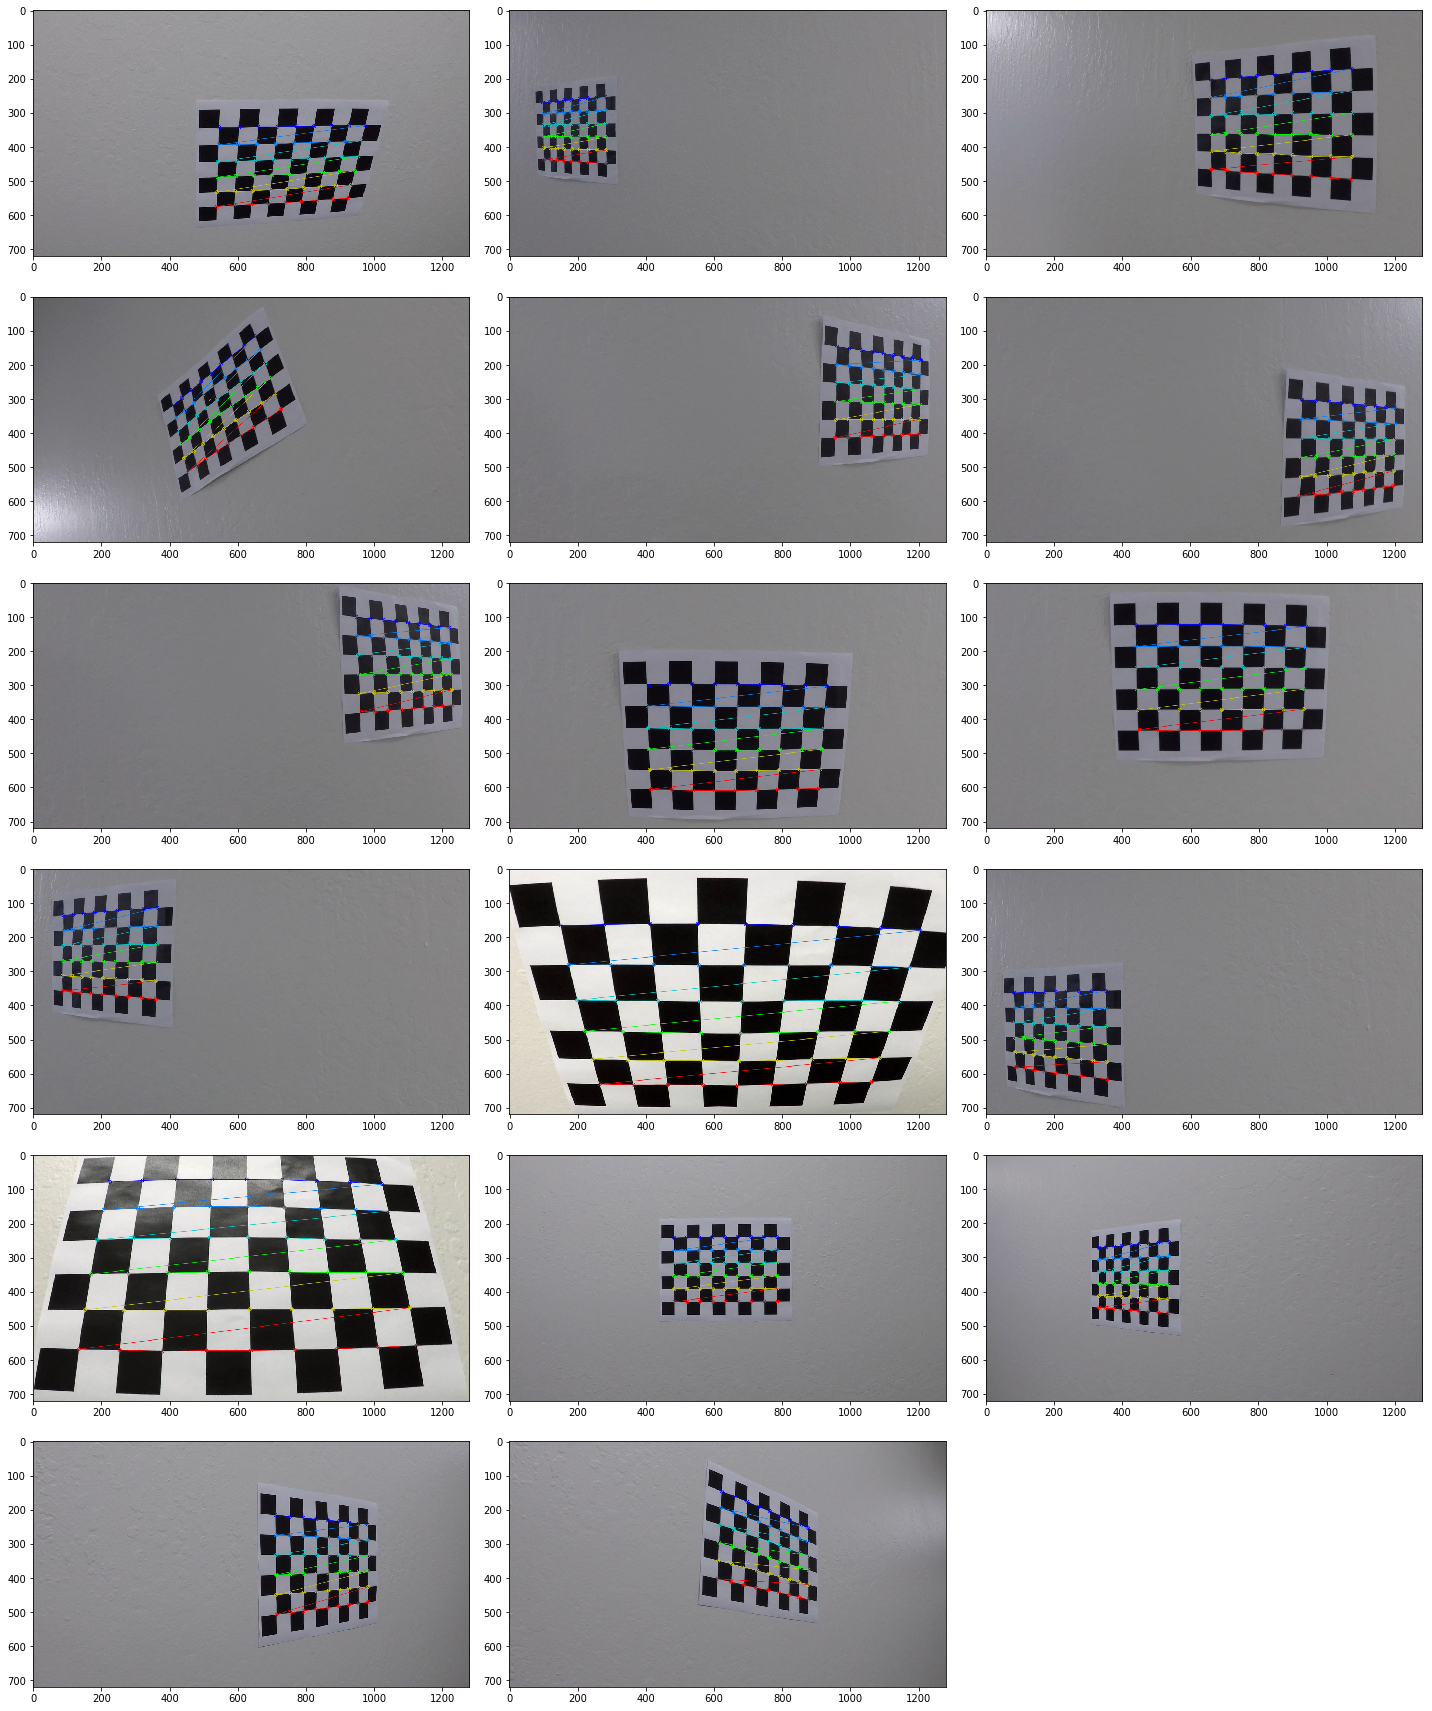

In [4]:
# Display the images with the marked chessboard corners to verify their correctness
obj_points, img_points, result_imgs = calibration_get_corners(cal_imgs, cal_imgs_shape)

cal_imgs_count = len(cal_imgs)
result_imgs_count = len(result_imgs)
print(f'Number of calibration images provided: {cal_imgs_count}\nNumber of valid images for calibration: {result_imgs_count}')
utils.plot_images_as_grid(result_imgs, images_per_row=3, figsize=(20, 24))

Text(0.5,1,'undistorted image')

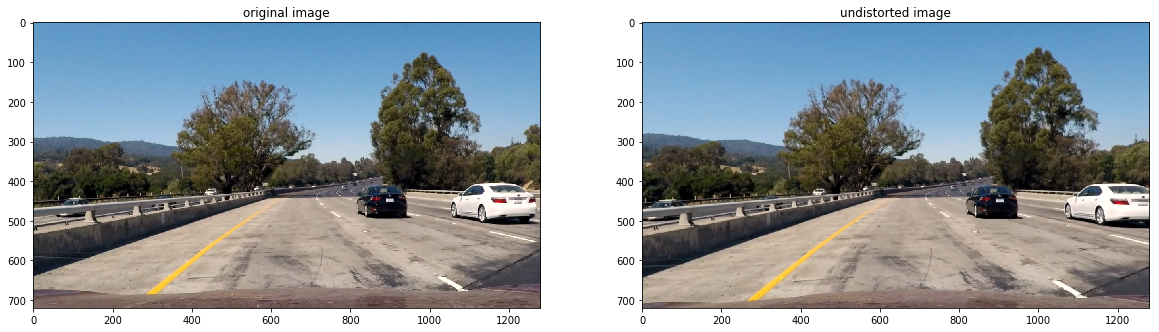

In [5]:
test_img = mpimg.imread(cal_test_img)
img_size = (test_img.shape[1], test_img.shape[0])

# Calibrate camera, get distortion coefficients and save them on disk
ret, mtx, dist, _, _ = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)
undistorted = cv2.undistort(test_img, mtx, dist, None, mtx)

# Save resulting coefficients
dist_pickle = {
    "mtx": mtx,
    "dist": dist
}
with open(cal_data_file, 'wb') as f:
    pickle.dump(dist_pickle, f)

test_img_basename = os.path.splitext(os.path.basename(cal_test_img))[0]
save_to_path = os.path.join(output_imgs_dir, f'{test_img_basename}_undistorted.jpg')
mpimg.imsave(save_to_path, undistorted)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_img)
ax1.set_title('original image')
ax2.imshow(undistorted)
ax2.set_title('undistorted image')

However, the undistorted image also shows that we lost some information at the edges (for example, the white car which is fully covered on the original image is cut a little bit on the undistorted image).